torch:  2.1 ; cuda:  cu118
detectron2: 0.6
[01/30 15:11:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


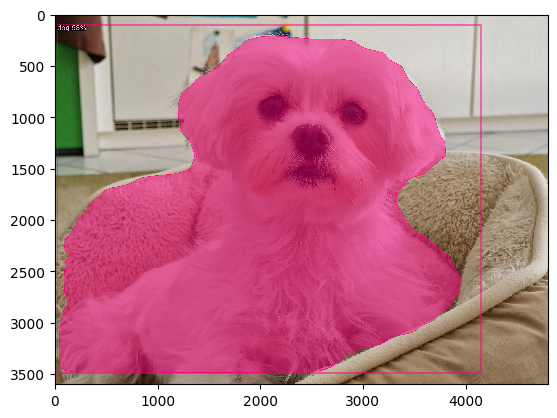

Test successful!


In [8]:
import torch
import detectron2

"""
Detectron2 Test Script

This script is a test for Detectron2, a computer vision library for object detection.
It checks the versions of the installed Torch and Detectron2 packages, sets up the Detectron2 logger,
and performs a comprehensive test by loading a sample image and making predictions using a pre-trained model.
It also visualizes the predicted result for quick visual confirmation.

Requirements:
- torch: The PyTorch deep learning library.
- detectron2: The Detectron2 library for object detection.

Usage:
- Run this script to check the versions of installed Torch and Detectron2 packages.
- Load a sample image, make predictions using a pre-trained model, and visualize the results.

Output:
- Torch version and CUDA version (if applicable) are printed.
- Detectron2 version is printed.
- A success message is printed if the test is completed successfully.
- The predicted result is visualized using a pre-trained model.

"""

# Get Torch version and CUDA version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

# Print Detectron2 version
print("detectron2:", detectron2.__version__)

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import os, json, cv2, random

# Import some common Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

#Import matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt

# Load a sample image for testing
image_path = "dog.jpg"
image = cv2.imread(image_path)

# Set up configuration and load pre-trained model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set detection threshold for visualization
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# Create predictor
predictor = DefaultPredictor(cfg)

# Make predictions on the sample image
outputs = predictor(image)

# Visualize the predicted result
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image(), interpolation='nearest')
plt.show()

# Print success message
print('Test successful!')